roll no:102303161

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



In [25]:
df = pd.read_csv("data.csv")
df.head()


/tmp/ipython-input-108415039.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("data.csv")


,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,01-02-1990
1,151.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,01-02-1990
2,152.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,01-02-1990
3,150.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,01-03-1990
4,151.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,01-03-1990


In [26]:
print(df.columns)


Index(['stn_code', 'sampling_date', 'state', 'location', 'agency', 'type',
       'so2', 'no2', 'rspm', 'spm', 'location_monitoring_station', 'pm2_5',
       'date'],
      dtype='object')


In [27]:
x = df["no2"].dropna().values


In [32]:
rno= 102303161

ar = 0.05 * (rno % 7)
br = 0.3 * ((rno % 5) + 1)

print("ar", ar)
print("br", br)

z = x + ar * np.sin(br * x)

ar 0.1
br 0.6


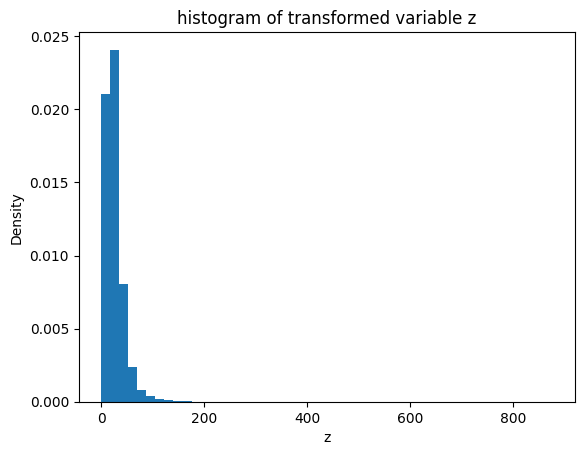

In [29]:
plt.hist(z, bins=50, density=True)
plt.title("histogram of transformed variable z")
plt.xlabel("z")
plt.ylabel("Density")
plt.show()


In [30]:

mu = np.mean(z)
sigma = np.std(z)

lam = 1 / (2 * sigma**2)

c = np.sqrt(lam / np.pi)

print("estimated parameters:")
print("Lambda :", lam)
print("Mu :", mu)
print("c:", c)


estimated parameters:
Lambda : 0.001460523735809626
Mu : 25.810838442217115
c: 0.021561519986176458


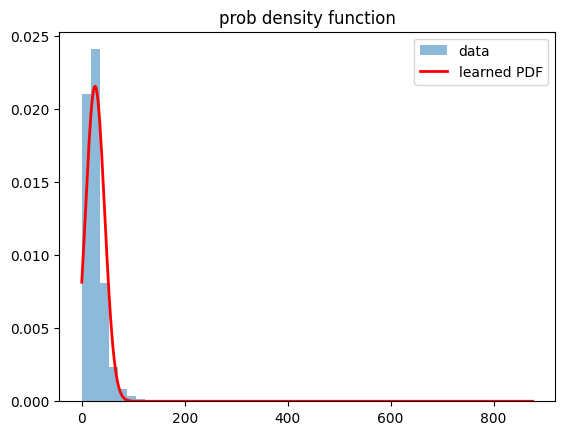

In [31]:
zrange = np.linspace(min(z), max(z), 500)
pdf_learned = c * np.exp(-lam * (zrange - mu)**2)

plt.hist(z, bins=50, density=True, alpha=0.5, label="data")
plt.plot(zrange, pdf_learned, 'r', linewidth=2, label="learned PDF")
plt.legend()
plt.title("prob density function")
plt.show()
